# Aprendizaje Supervisado
**Grupo 5 Cohorte 2**
* Patricia Loto
* Sandra Monica Olariaga
* Veronica Bornancini
* María Soledad Fernandez 

In [1]:
%matplotlib inline


# DBSCAN clustering
* Encuentra muestras core y expande clusters sobre ellas. 
* Tiene dos parámetros, eps y num of samples. Es muy sensitivo a los parametros 
* Para este grupo de datos, repeti el agrupamiento con tres valores de eps, y obtuve un buen agrupamiento en el maximo del caeficiente de silueta.
* Es lo que deberia hacer para encontrar un valor razonable de eps. 

In [5]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [6]:
from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns
import plotly.io as pio
pio.renderers.default = "browser"
import plotly.express as px

In [4]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [7]:
df=pd.read_csv("players_20.csv")

In [8]:
df_n=df[(df['overall']>70)] # mejores jugadores

skills_ratings = ['attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
                  'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
                  'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions',
                  'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
                  'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 
                  'mentality_composure', 'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle',
                  'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

df_skills=df_n[skills_ratings]
df_skills

,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
1,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
2,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
3,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
4,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4751,58,70,54,68,59,64,62,41,65,73,62,71,72,75,78,58,44,52,54,68,60,65,74,71,55,76,34,52,46,12,12,16,7,8
4752,57,71,66,64,75,74,67,68,58,75,66,62,67,73,57,73,64,65,79,70,60,37,65,66,70,71,18,33,36,8,8,10,12,12
4753,70,53,61,70,51,69,70,53,77,68,60,57,67,69,64,71,63,77,68,64,83,65,65,68,61,69,69,71,65,10,7,12,13,8
4754,58,54,68,66,50,67,49,53,64,69,62,66,64,70,65,70,61,73,77,64,71,72,56,65,61,69,71,73,72,6,10,9,11,7


### Escalamos los datos del dataset

In [4]:
#escalamos
X = StandardScaler().fit_transform(df_skills)

### Computamos usando DBSCAN

In [9]:
# Compute DBSCAN

#EPS = 20
db = DBSCAN(eps=20, min_samples=100, metric='cityblock').fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

### Verificamos la cantidad de cluster

In [10]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 0


### Verificamos cuantos casos hay en cada cluster

In [11]:
df_n['dbscan'] = db.labels_ #clusters

In [13]:
df_n[['short_name','dbscan']].groupby('dbscan').agg(['count'])

,short_name
,count
dbscan,
0,440
1,4316


### Imprimimos las estadísticas del modelo

In [17]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Silhouette Coefficient: 0.596


### Graficamos

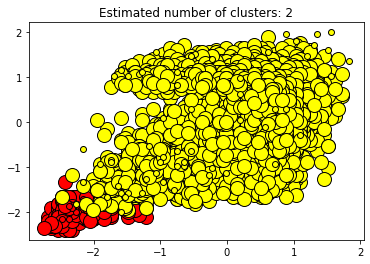

In [18]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.autumn(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

### Volvemos a computar el modelo pero cambiando el hiperparametro EPS

* EPS es la distancia máxima entre dos muestras para que una se considere próxima a la otra. Este no es un límite máximo en las distancias de los puntos dentro de un grupo. Este es el parámetro DBSCAN más importante para elegir adecuadamente para su conjunto de datos y función de distancia.

In [49]:
# Compute DBSCAN

#EPS = 10
db = DBSCAN(eps=10,min_samples=10, metric='cityblock').fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

### Verificamos la cantidad de cluster encontrados

In [50]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 1897


* Variando la cantidad en el hiper parametro EPS podemos ver que la cantidad de cluster encontrados oscila entre 1 y 2. Lo que varian son la cantidad de puntos de ruido

### Verificamos cuantos casos hay en cada cluster

In [51]:
df_n['dbscan1'] = db.labels_ #clusters

In [52]:
df_n[['short_name','dbscan1']].groupby('dbscan1').agg(['count'])

,short_name
,count
dbscan1,
-1,1897
0,322
1,2537


### Imprimimos las estadisticas del Modelo

In [53]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Silhouette Coefficient: 0.121


### Graficamos

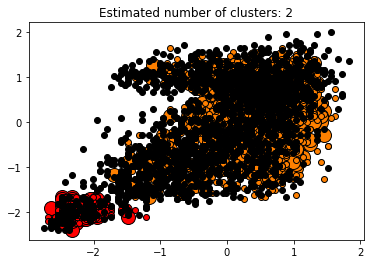

In [54]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.autumn(each)
          for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

**NOTA:** 
* Encontramos dos clusters con muchos puntos de ruido, esto va variando de acuerdo al parametro EPS, cuando más grande el valor menos puntos de ruido.